# An example of Portfolio theory and Efficient frontier


## Content

- Data
    - Upload and visualize data
    - Preprocess prices and transform to returns


- Mean-variance analysis
    - Calculate portfolio statistics
    - Simulate Monte Carlo portfolios
    
   
- Efficient frontier
    - Maximum Sharpe ratio portfolio
    - Plotting the efficient frontier
        
        
- Capital Market Line
    - Interpolate the efficient frontier
    - Solve the system of equations
    - Plotting the CM line

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("bmh")
plt.rcParams['font.family'] = 'DejaVu Sans'
%config InlineBackend.figure_formats=["png"]

## Data

### Upload and visualize data

In [3]:
# !pip install yfinance

In [4]:
import yfinance as yf

selected_companies = ['AAPL',  'MSFT', 'MMM', 'NKE', 'GS', 'MCD']
n_companies = len(selected_companies)

data = yf.download(selected_companies, '2016-01-01','2019-12-31' , group_by="column")

data.head()

[*********************100%%**********************]  6 of 6 completed


Adj Close                                                \
                 AAPL          GS        MCD         MMM       MSFT   
Date                                                                  
2016-01-04  24.009066  152.116165  97.185165  113.048569  48.797726   
2016-01-05  23.407417  149.497086  98.524162  113.541344  49.020348   
2016-01-06  22.949339  145.847427  97.862938  111.254478  48.129883   
2016-01-07  21.980776  141.364807  95.598198  108.544159  46.455780   
2016-01-08  22.096994  140.780884  95.449417  108.174568  46.598270   

                           Close                                      ...  \
                  NKE       AAPL          GS         MCD         MMM  ...   
Date                                                                  ...   
2016-01-04  56.560806  26.337500  177.139999  117.580002  146.820007  ...   
2016-01-05  57.351467  25.677500  174.089996  119.199997  147.460007  ...   
2016-01-06  56.533218  25.174999  169.839996  118.400002  144.490005  ...   
2016-01-07  55.025429  24.112499  164.619995  115.660004  140.970001  ...   
2016-01-08  54.124409  24.240000  163.940002  115.480003  140.490005  ...   

                  Open                                       Volume           \
                   MCD         MMM       MSFT        NKE       AAPL       GS   
Date                                                                           
2016-01-04  117.250000  148.050003  54.320000  61.110001  270597600  3745500   
2016-01-05  117.410004  146.820007  54.930000  61.720001  223164000  4521600   
2016-01-06  118.000000  145.589996  54.320000  61.299999  273829600  5539400   
2016-01-07  117.440002  142.520004  52.700001  60.389999  324377600  5687900   
2016-01-08  115.750000  141.360001  52.369999  60.060001  283192000  4929800   

                                                  
                MCD      MMM      MSFT       NKE  
Date                                              
2016-01-04  9995000  3277200  53778000  11626800  
2016-01-05  6314000  2688100  34079700   9220600  
2016-01-06  6543800  2997100  39518900   6551600  
2016-01-07  7477900  3553500  56564900  10881300  
2016-01-08  6103400  2664000  48754000  11191300  

[5 rows x 36 columns]

In [23]:
# prices = pd.read_csv('data.csv', sep=';', index_col='Date')

In [18]:
prices = data['Adj Close'].dropna()

print(prices.shape)
prices.head()

(1005, 6)


,AAPL,GS,MCD,MMM,MSFT,NKE
Date,,,,,,
2016-01-04,24.009066,152.116165,97.185165,113.048569,48.797726,56.560806
2016-01-05,23.407417,149.497086,98.524162,113.541344,49.020348,57.351467
2016-01-06,22.949339,145.847427,97.862938,111.254478,48.129883,56.533218
2016-01-07,21.980776,141.364807,95.598198,108.544159,46.455780,55.025429
2016-01-08,22.096994,140.780884,95.449417,108.174568,46.598270,54.124409


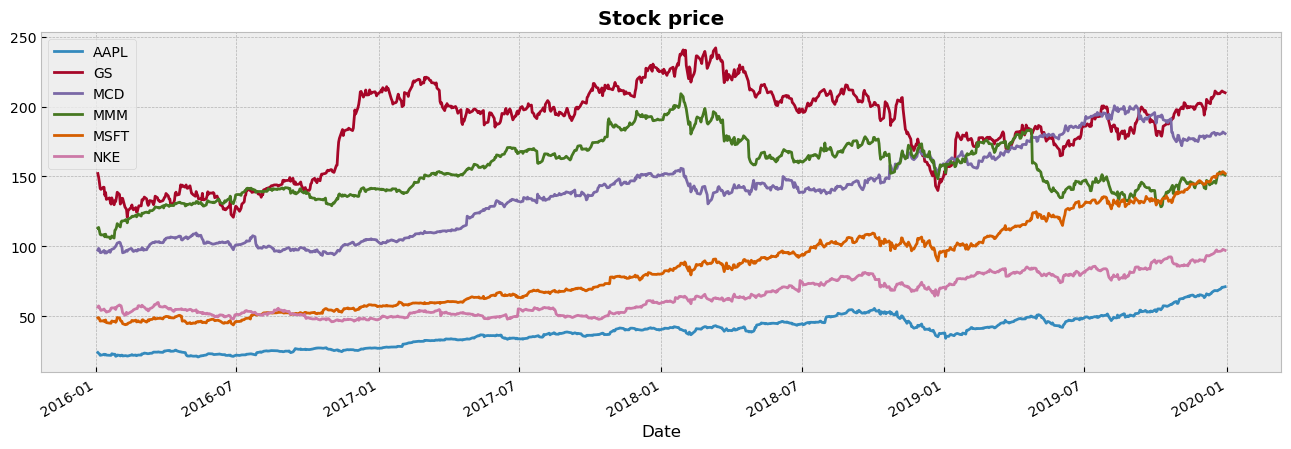

In [27]:
prices.plot(figsize=(16, 5))
plt.title("Stock price", weight="bold")

plt.show()

In [28]:
returns = prices.pct_change().dropna()

returns.head()

,AAPL,GS,MCD,MMM,MSFT,NKE
Date,,,,,,
2016-01-05,-0.025059,-0.017218,0.013778,0.004359,0.004562,0.013979
2016-01-06,-0.019570,-0.024413,-0.006711,-0.020141,-0.018165,-0.014267
2016-01-07,-0.042204,-0.030735,-0.023142,-0.024361,-0.034783,-0.026671
2016-01-08,0.005287,-0.004131,-0.001556,-0.003405,0.003067,-0.016375
2016-01-11,0.016193,0.010918,0.010478,-0.000214,-0.000573,0.011551


## Mean-variance analysis

### Calculate portfolio statistics

In [29]:
returns.mean()

AAPL    0.001200
GS      0.000437
MCD     0.000670
MMM     0.000367
MSFT    0.001229
NKE     0.000651
dtype: float64

In [30]:
returns.std()

AAPL    0.015341
GS      0.015220
MCD     0.010247
MMM     0.012490
MSFT    0.013817
NKE     0.015008
dtype: float64

In [31]:
returns.mean() / returns.std()

AAPL    0.078204
GS      0.028711
MCD     0.065424
MMM     0.029392
MSFT    0.088927
NKE     0.043352
dtype: float64

One portfolio with equal weights

In [32]:
weights = np.ones(shape=(n_companies,)) / n_companies

weights

array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667])

In [33]:
portfolio_returns = np.dot(returns.values, weights)
portfolio_returns

array([-0.00093317, -0.01721129, -0.03031611, ...,  0.00680947,
        0.00283939, -0.00473645])

In [34]:
portfolio_returns.mean() / portfolio_returns.std()

0.07968312050827048

### Simulate Monte Carlo portfolios

In [35]:
mc_returns = []
mc_vols = []

n_trials = 10 ** 4

for _ in range(n_trials):
    weights = np.random.rand(n_companies)
    weights /= np.sum(weights)
    
    portfolio_returns = np.dot(returns.values, weights)
    
    mc_returns.append(252 * portfolio_returns.mean())
    mc_vols.append(np.sqrt(252) * portfolio_returns.std())
    
    
mc_returns = np.array(mc_returns)
mc_vols = np.array(mc_vols)

mc_sharpe = mc_returns / mc_vols

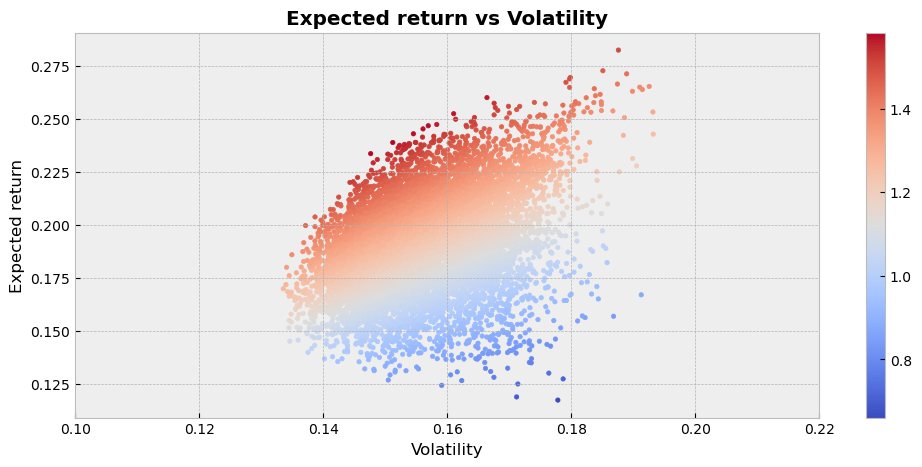

In [36]:
fig = plt.figure(figsize=(12, 5))

points = plt.scatter(mc_vols, mc_returns, c=mc_sharpe, s=10, cmap="coolwarm")
plt.colorbar(points)

plt.xlim(0.1, 0.22)

plt.xlabel("Volatility")
plt.ylabel("Expected return")
plt.title("Expected return vs Volatility", weight="bold")

plt.show()

## Efficient frontier

The efficient frontier is the set of optimal portfolios that offer the highest expected return for a defined level of risk or the lowest risk for a given level of expected return.

### Maximum Sharpe ratio portfolio

Sharpe ratio measures the performance of an investment such as a security or portfolio compared to a risk-free asset, after adjusting for its risk.
 
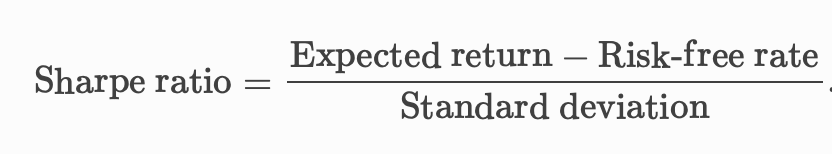

https://gurobi-optimization-gurobi-optimods.readthedocs-hosted.com/en/stable/mods/sharpe-ratio.html

#### Task: write functions to calculate negative Sharpe ratio
`Hint`: for volatility we take np.sqrt(252), for simplicity let's assume that risk-free rate is 0.

In [18]:
def portfolio_return(weights, returns):
    ... 
    
    return ...


def portfolio_variance(weights, returns):
    ...
    
    return ...


def negative_sharpe_ratio(weights, returns):
    
    ret = ...
    vol = ...
    
    return -ret / vol

In [56]:
from scipy.optimize import minimize

def optimize(returns):
        
    init_guess = np.ones(shape=(returns.shape[1],)) / returns.shape[1]
    
    bounds = ((0.0, 1.0),) * n_companies
    
    constraints = ({'type': 'eq',
                    'fun': lambda w: 1.0 - np.sum(w)})
    
    optimization_result = minimize(negative_sharpe_ratio, args=(returns),
                       x0=init_guess,
                       bounds=bounds,
                       constraints=constraints,
                       method='SLSQP',
                       options={'disp': False})
    
    return optimization_result

In [57]:
optimization_result = optimize(returns)

In [58]:
# Portfolio weights
optimization_result.x

array([2.42994859e-01, 4.55364912e-18, 3.78941410e-01, 0.00000000e+00,
       3.78063731e-01, 4.74880552e-17])

### Plotting the efficient frontier

#### Task: implement optimization function with additional constraint for target return

In [48]:
def optimize_for_target_return(returns, target_ret):
        
    init_guess = np.ones(shape=(returns.shape[1],)) / returns.shape[1]
    
    bounds = ((-1.0, 1.0),) * n_companies
    
    constraints = (
        {'type': 'eq',
         'fun': lambda w: 1.0 - np.sum(w)},
        ### your code here
        ...
    )
    
    result = minimize(portfolio_variance, args=(returns),
                       x0=init_guess,
                       bounds=bounds,
                       constraints=constraints,
                       method='SLSQP',
                       options={'disp': False})
    
    return result.fun, result.x

In [62]:
target_ret = 0.15

In [63]:
optimization_result = optimize_for_target_return(returns, target_ret)

In [65]:
# weights
optimization_result.x

array([ 0.06018998,  0.08349295,  0.52001247,  0.24710835, -0.01875299,
        0.10794924])

In [67]:
# optimized target_ret
optimization_result.fun

0.1327969152644047

#### Task: write a cycle to optimize portfolio weights for multiple target returns
you'll get optimal volatilities for every given target return, then plot it to display an efficient frontier.

In [24]:
target_returns = np.linspace(0.07, 0.3, 10)
optimal_vols = []

...
    
optimal_vols = np.array(optimal_vols)

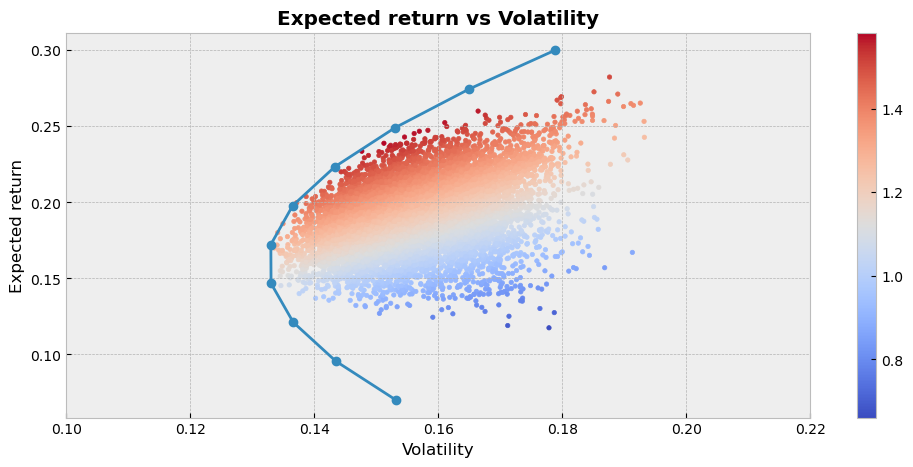

In [73]:
fig = plt.figure(figsize=(12, 5))

points = plt.scatter(mc_vols, mc_returns, c=mc_sharpe, s=10, cmap="coolwarm")
plt.colorbar(points)

...

plt.xlim(0.1, 0.22)

plt.xlabel("Volatility")
plt.ylabel("Expected return")
plt.title("Expected return vs Volatility", weight="bold")

plt.show()

## Capital Market Line

### Interpolate the efficient frontier

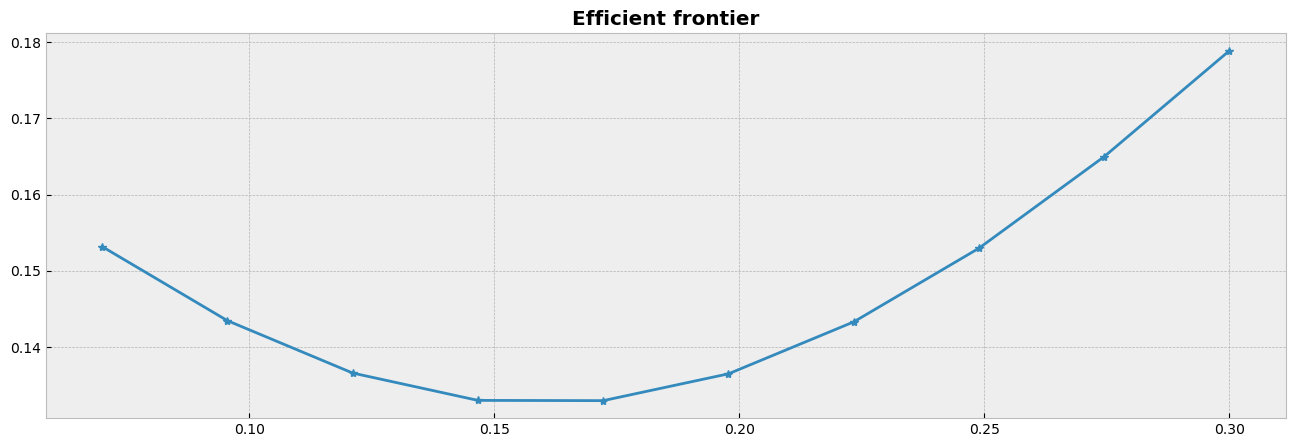

In [74]:
fig = plt.figure(figsize=(16, 5))

plt.plot(target_returns, optimal_vols, marker='*')

plt.title("Efficient frontier", weight="bold")

plt.show()

In [76]:
from scipy.interpolate import UnivariateSpline, interp1d

frontier = UnivariateSpline(target_returns, optimal_vols)
x = np.linspace(0.06, 0.32, 100)
y = frontier(x)

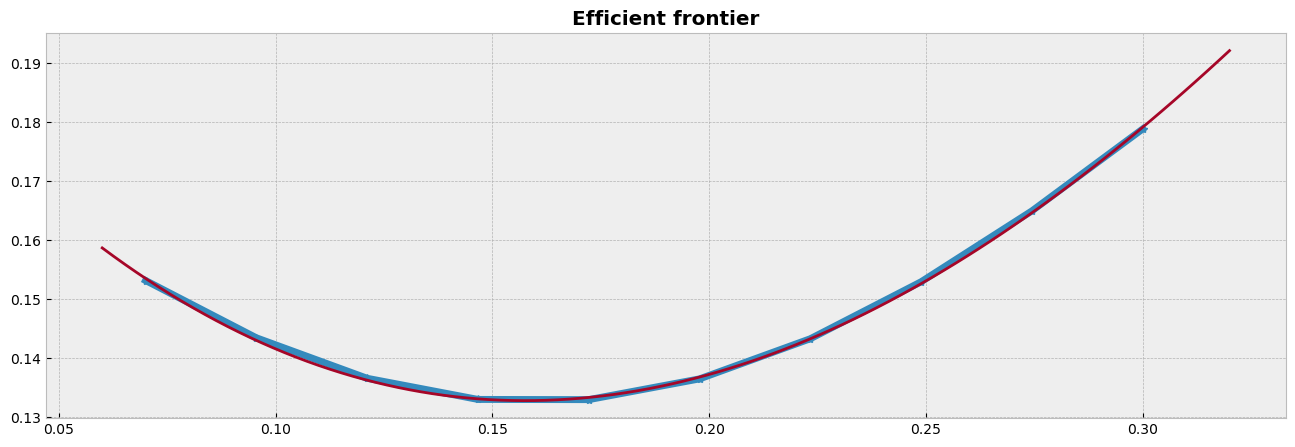

In [77]:
fig = plt.figure(figsize=(16, 5))

plt.plot(target_returns, optimal_vols, linewidth=5, marker='*')
plt.plot(x, y, linewidth=2)

plt.title("Efficient frontier", weight="bold")

plt.show()

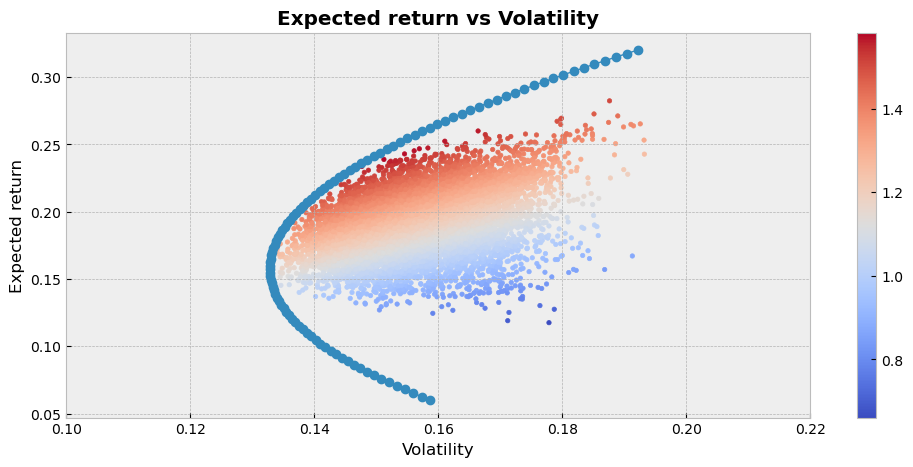

In [81]:
fig = plt.figure(figsize=(12, 5))

points = plt.scatter(mc_vols, mc_returns, c=mc_sharpe, s=10, cmap="coolwarm")
plt.colorbar(points)

plt.plot(y, x, marker='o', linewidth=1)

plt.xlim(0.1, 0.22)

plt.xlabel("Volatility")
plt.ylabel("Expected return")
plt.title("Expected return vs Volatility", weight="bold")

plt.show()

### Solve the system of equations

In [93]:
d_frontier = frontier.derivative(n=1)

rf = 0.0001

def equations(p, rf=rf):
    
    eq1 = rf + p[0]*p[1] - frontier(p[1])
    eq2 = p[0] - d_frontier(p[1])
    
    return eq1, eq2

In [94]:
from scipy.optimize import fsolve

opt = fsolve(equations, [1.5, 0.15])

opt

array([0.59673201, 0.29514861])

### Plotting the CM line

The Capital Market Line is a graphical representation of all the portfolios that optimally combine risk and return.

In [95]:
xx = np.linspace(0, 0.2, 50)
yy = rf + 1/opt[0] * xx

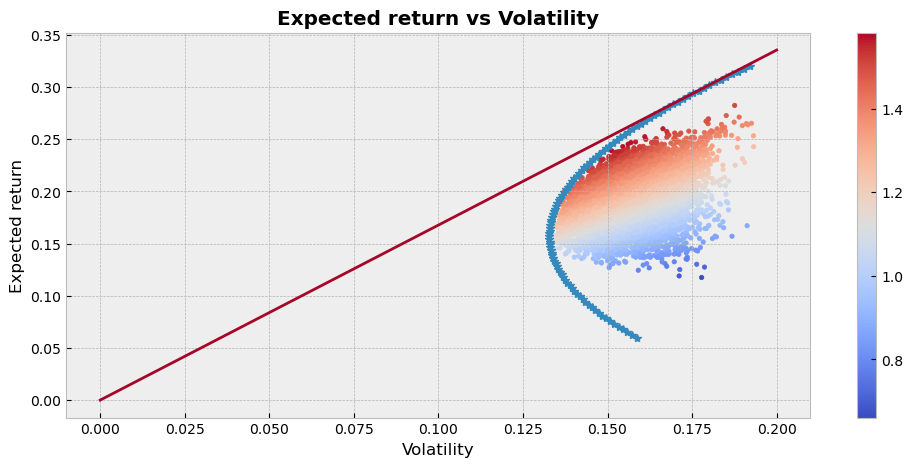

In [96]:
fig = plt.figure(figsize=(12, 5))

points = plt.scatter(mc_vols, mc_returns, c=mc_sharpe, s=10, cmap="coolwarm")
plt.colorbar(points)

plt.plot(y, x, marker='*', linewidth=2)
plt.plot(xx, yy, linewidth=2)

# plt.xlim(0.1, 0.22)

plt.xlabel("Volatility")
plt.ylabel("Expected return")
plt.title("Expected return vs Volatility", weight="bold")

plt.show()